In [2]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
## loading airway data
p,x = load_GTEx_1d(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
#print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)
#print('FDP: %s\n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## airway data ##
# hypothesis: 464636
p=0.715193, x=6.48616078894
p=0.798508, x=9.96232233826
p=0.08865, x=9.99747868096
p=0.778747, x=10.095057874
p=0.915566, x=10.1279102853


### bh summary ###
# rejections: 1536
rejection threshold: 0.000330371


### sbh summary ###
# rejections: 1560
rejection threshold: 0.000346199
null estimate: 0.960983436497




### Testing ###

### ML initialization starts ###



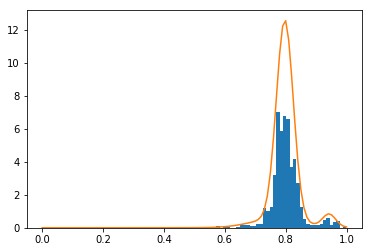

## Learned parameters: ##
Slope: w=0.00820128814353, a=2.5976318359375004
Bump 0: w=0.0418219937474, mu=[ 0.9427312], sigma=[ 0.02139735]
Bump 1: w=0.104729730741, mu=[ 0.76610879], sigma=[ 0.08078877]
Bump 2: w=0.845246987368, mu=[ 0.797272], sigma=[ 0.0277769]




In [4]:
## testing the initialization 
temp_x = (x - np.min(x)) / (np.max(x)-np.min(x))
w,a,mu,sigma = ML_init(p,temp_x,3,alpha=0.1,n_itr=100,h=None,verbose=True)

# plt.figure()
# temp=np.linspace(0,1,101)
# plt.hist(x[h==1],bins=50,weights=1/np.sum(h==1)*50*np.ones([np.sum(h==1)]))
# temp = np.linspace(0,1,101)
# plt.plot(temp,f_all(temp,a,mu,sigma,w))
# plt.show()

### Parameters
n_itr=5000, n_samp=464636, lambda0=3026.90006084, lambda1=100.0
### ML initialization starts ###



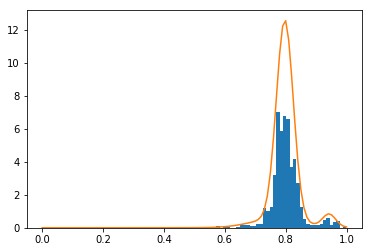

## Learned parameters: ##
Slope: w=0.00820128814353, a=2.5976318359375004
Bump 0: w=0.0418219937474, mu=[ 0.9427312], sigma=[ 0.02139735]
Bump 1: w=0.104729730741, mu=[ 0.76610879], sigma=[ 0.08078877]
Bump 2: w=0.845246987368, mu=[ 0.797272], sigma=[ 0.0277769]


## # of discovery: 2225
### initialization value ###
Slope: a=[ 2.59763193], b=[-14.66515541]
Bump 0: w=-8.54481, mu=[ 0.9427312], sigma=[ 0.00091569]
Bump 1: w=-8.95542, mu=[ 0.76610881], sigma=[ 0.01305365]
Bump 2: w=-5.79954, mu=[ 0.79727203], sigma=[ 0.00154311]


### iteration 0 ###
mean t:  0.000427246
mean discovery:  0.00436255477406
loss1:  [-0.0045214]
loss2:  [ 0.]
n_rej:  2027
Estimated FDP: [ 0.09449429]
FDP: 0.0
Slope: a=[ 2.59856987], b=[-14.66420841]
Bump 0: w=-8.54382, mu=[ 0.941733], sigma=[ 0.00091569]
Bump 1: w=-8.95442, mu=[ 0.7671082], sigma=[ 0.01305365]
Bump 2: w=-5.79854, mu=[ 0.79827195], sigma=[ 0.00154311]


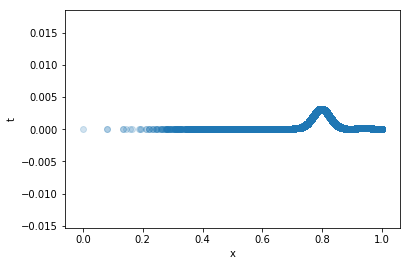



### iteration 1000 ###
mean t:  0.000460815
mean discovery:  0.00470691035563
loss1:  [-0.0048653]
loss2:  [ 0.]
n_rej:  2187
Estimated FDP: [ 0.09471449]
FDP: 0.0
Slope: a=[ 2.60439014], b=[-14.65003681]
Bump 0: w=-8.53624, mu=[ 0.8412832], sigma=[ 0.00091569]
Bump 1: w=-8.76381, mu=[ 0.76274282], sigma=[ 0.01305365]
Bump 2: w=-5.5106, mu=[ 0.79382455], sigma=[ 0.00154311]


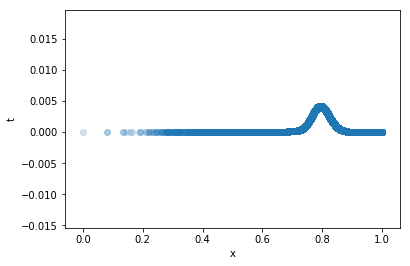



### iteration 2000 ###
mean t:  0.000486499
mean discovery:  0.00497593815374
loss1:  [-0.00513665]
loss2:  [ 0.]
n_rej:  2312
Estimated FDP: [ 0.0947114]
FDP: 0.0
Slope: a=[ 2.56362629], b=[-14.68319988]
Bump 0: w=-8.44427, mu=[ 0.83360243], sigma=[ 0.00091569]
Bump 1: w=-8.61249, mu=[ 0.7450189], sigma=[ 0.01305365]
Bump 2: w=-5.24213, mu=[ 0.77960998], sigma=[ 0.00154311]


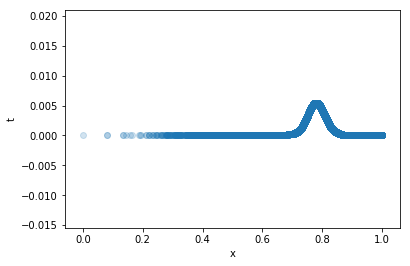



### iteration 3000 ###
mean t:  0.00055066
mean discovery:  0.00536549040539
loss1:  [-0.00549898]
loss2:  [  7.62694981e-05]
n_rej:  2493
Estimated FDP: [ 0.10013869]
FDP: 0.0
Slope: a=[ 2.46652412], b=[-14.77370644]
Bump 0: w=-8.3164, mu=[ 0.82757777], sigma=[ 0.00091569]
Bump 1: w=-8.50533, mu=[ 0.71120733], sigma=[ 0.01305365]
Bump 2: w=-4.9996, mu=[ 0.77356607], sigma=[ 0.00154311]


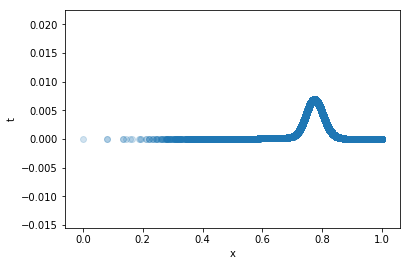

In [ ]:
## test prim_fdr
n_rej,t=PrimFDR(p,temp_x,3,alpha=0.1,h=None,n_itr=5000,verbose=True)

print("### Summary ###")
print("method: perim_test_1d")
print("# rejections: %s"%str(n_rej))
print("FDP: %s"%str( np.sum((h==0)*(p<t))/np.sum(p<t)))
print("### End Summary ###")